In [1]:
import os

In [2]:
paths_train = os.listdir('/kaggle/input/scammer/train')

In [5]:
ann_train = '/kaggle/input/scammer/train/'
for i in range(len(paths_train)):
    if(paths_train[i][-3:] == 'jpg'):
        pass
    else:
        st = ann_train + paths_train[i]
        ind_to_remove = i
t = paths_train.pop(ind_to_remove)

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(st)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,rgb_0151_png.rf.f5aae835e35fc8bc9c1d295c2caa87...,600,600,not fall,346,242,402,420
1,WhatsApp-Video-2022-08-02-at-2_50_24-PM_mp4-20...,600,600,not fall,273,135,466,395
2,WhatsApp-Video-2022-08-02-at-5_16_54-PM_mp4-17...,600,600,FALL ALERT-,218,320,408,465
3,WhatsApp-Video-2022-08-02-at-5_19_43-PM_mp4-33...,600,600,not fall,212,223,321,362
4,WhatsApp-Video-2022-08-02-at-5_05_51-PM_mp4-35...,600,600,not fall,292,159,343,334


In [8]:
temp_train = list(set(df['filename']))

In [9]:
set(temp_train).difference(set(paths_train))

{'3050_jpg.rf.ea5904047282397485b4c81ec232bb3d.jpg',
 'WhatsApp-Video-2022-08-02-at-5_19_43-PM_mp4-407_jpg.rf.8ea290d4b909c8ba1969cb8dc388bfed.jpg'}

In [10]:
to_train = list(set(paths_train).difference(set(temp_train)))

In [11]:
real_paths_train = []
for i in range(len(paths_train)):
    if(paths_train[i] in to_train):
        pass    
    else:
        real_paths_train.append(paths_train[i])

In [12]:
df_real_train = pd.DataFrame()
address = []
classes = []
xmins = []
xmaxs = []
ymins = []
ymaxs = []
for i in range(len(df)):
    if(df['filename'][i] in real_paths_train):
        address.append(df['filename'][i])
        classes.append(df['class'][i])
        xmins.append(df['xmin'][i])
        xmaxs.append(df['xmax'][i])
        ymins.append(df['ymin'][i])
        ymaxs.append(df['ymax'][i])
        real_paths_train.remove(df['filename'][i])
df_real_train['filename'] = address
df_real_train['class'] = classes
df_real_train['xmin'] = xmins
df_real_train['xmax'] = xmaxs
df_real_train['ymin'] = ymins
df_real_train['ymax'] = ymaxs

In [13]:
len(df_real_train)

4789

In [14]:
df_real_train['class'].unique()

array(['not fall', 'FALL ALERT-'], dtype=object)

In [15]:
df_real_train['class'].value_counts()

class
not fall       3829
FALL ALERT-     960
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import cv2

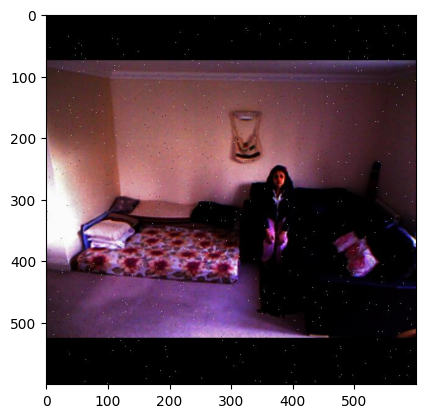

In [17]:
img = plt.imread(ann_train+df_real_train['filename'][0])
plt.imshow(img)
plt.show()

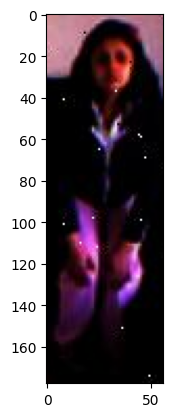

In [18]:
img_changed = img[df_real_train['ymin'][0]:df_real_train['ymax'][0],df_real_train['xmin'][0]:df_real_train['xmax'][0]]
plt.imshow(img_changed)
plt.show()

In [19]:
complete_all_0 = []
complete_all_1 = []
for i in range(len(df_real_train)):
    if(df_real_train['class'][i] == 'not fall' and len(complete_all_0)<960):
        img = plt.imread(ann_train+df_real_train['filename'][i])
        img_changed = img[df_real_train['ymin'][i]:df_real_train['ymax'][i],df_real_train['xmin'][i]:df_real_train['xmax'][i]]
        img_changed = cv2.resize(img_changed,(128,128))
        complete_all_0.append(img_changed)
    elif(df_real_train['class'][i] == 'FALL ALERT-' and len(complete_all_1)<960):
        img = plt.imread(ann_train+df_real_train['filename'][i])
        img_changed = img[df_real_train['ymin'][i]:df_real_train['ymax'][i],df_real_train['xmin'][i]:df_real_train['xmax'][i]]
        img_changed = cv2.resize(img_changed,(128,128))
        complete_all_1.append(img_changed)

In [20]:
print(len(complete_all_0))
print(len(complete_all_1))

960
960


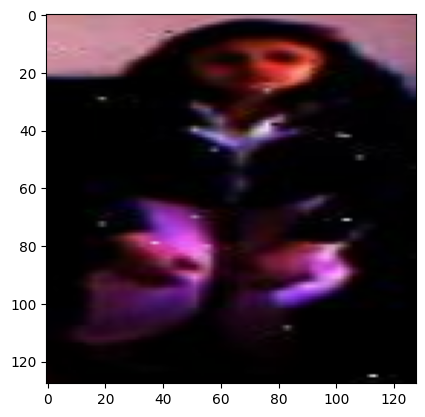

In [21]:
plt.imshow(complete_all_0[0])
plt.show()

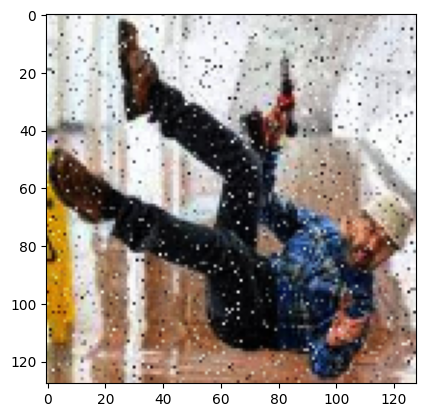

In [22]:
plt.imshow(complete_all_1[875])
plt.show()

In [23]:
complete_images = complete_all_0+complete_all_1

In [24]:
print(len(complete_images))

1920


In [25]:
paths_val = os.listdir('/kaggle/input/scammer/valid')

In [26]:
print(len(paths_val))

462


In [27]:
ann_val = '/kaggle/input/scammer/valid/'
for i in range(len(paths_val)):
    if(paths_val[i][-3:] == 'jpg'):
        pass
    else:
        st = ann_val + paths_val[i]
        ind_to_remove = i
paths_val.pop(ind_to_remove)
print(len(paths_val))

461


In [28]:
df_val = pd.read_csv(st)
df_val.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,WhatsApp-Video-2022-08-02-at-5_16_54-PM_mp4-80...,600,600,not fall,224,135,323,434
1,WhatsApp-Video-2022-08-02-at-5_19_43-PM_mp4-12...,600,600,not fall,349,270,457,464
2,WhatsApp-Video-2022-08-06-at-4_41_58-PM_mp4-23...,600,600,not fall,223,284,360,465
3,WhatsApp-Video-2022-08-02-at-5_09_18-PM_mp4-59...,600,600,not fall,216,135,331,413
4,WhatsApp-Video-2022-08-02-at-5_19_43-PM_mp4-27...,600,600,not fall,209,215,335,365


In [29]:
set(df_val['filename']).difference(set(paths_val))

set()

In [30]:
s = set(paths_val).difference(set(df_val['filename']))

In [31]:
real_paths_val = []
for i in range(len(paths_val)):
    if(paths_val[i] in s):
        pass    
    else:
        real_paths_val.append(paths_val[i])
print(len(real_paths_val))

454


In [32]:
df_real_val = pd.DataFrame()
address = []
classes = []
xmins = []
xmaxs = []
ymins = []
ymaxs = []
for i in range(len(df_val)):
    if(df_val['filename'][i] in real_paths_val):
        address.append(df_val['filename'][i])
        classes.append(df_val['class'][i])
        xmins.append(df_val['xmin'][i])
        xmaxs.append(df_val['xmax'][i])
        ymins.append(df_val['ymin'][i])
        ymaxs.append(df_val['ymax'][i])
        real_paths_val.remove(df_val['filename'][i])
df_real_val['filename'] = address
df_real_val['class'] = classes
df_real_val['xmin'] = xmins
df_real_val['xmax'] = xmaxs
df_real_val['ymin'] = ymins
df_real_val['ymax'] = ymaxs

In [33]:
print(len(df_real_val))

454


In [34]:
df_real_val['class'].value_counts()

class
not fall       367
FALL ALERT-     87
Name: count, dtype: int64

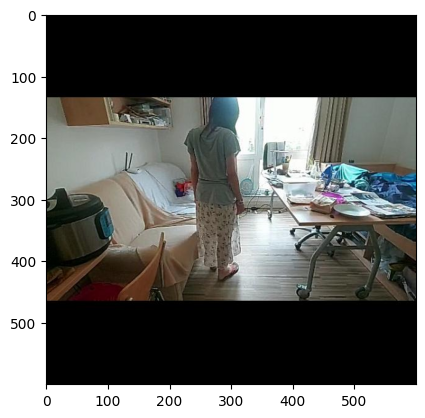

In [35]:
img = plt.imread(ann_val+df_real_val['filename'][0])
plt.imshow(img)
plt.show()

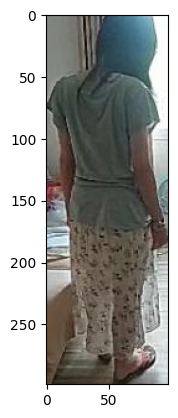

In [36]:
img_changed = img[df_real_val['ymin'][0]:df_real_val['ymax'][0],df_real_val['xmin'][0]:df_real_val['xmax'][0]]
plt.imshow(img_changed)
plt.show()

In [37]:
complete_all_0_val = []
complete_all_1_val = []
for i in range(len(df_real_val)):
    if(df_real_val['class'][i] == 'not fall' and len(complete_all_0_val)<87):
        img = plt.imread(ann_val+df_real_val['filename'][i])
        img_changed = img[df_real_val['ymin'][i]:df_real_val['ymax'][i],df_real_val['xmin'][i]:df_real_val['xmax'][i]]
        img_changed = cv2.resize(img_changed,(128,128))
        complete_all_0_val.append(img_changed)
    elif(df_real_val['class'][i] == 'FALL ALERT-' and len(complete_all_1_val)<87):
        img = plt.imread(ann_val+df_real_val['filename'][i])
        img_changed = img[df_real_val['ymin'][i]:df_real_val['ymax'][i],df_real_val['xmin'][i]:df_real_val['xmax'][i]]
        img_changed = cv2.resize(img_changed,(128,128))
        complete_all_1_val.append(img_changed)

In [38]:
print(len(complete_all_0_val))
print(len(complete_all_1_val))

87
87


In [39]:
complete_images.extend(complete_all_0_val)
complete_images.extend(complete_all_1_val)

In [40]:
import numpy as np

In [41]:
X_train = np.asarray(complete_images)

In [42]:
X_train = X_train.astype(np.float64)

In [43]:
y_train = [0]*960 + [1]*960 + [0]*87 + [1]*87
y_train = np.array(y_train)

In [44]:
X_train.shape

(2094, 128, 128, 3)

In [45]:
X_train/=255.0

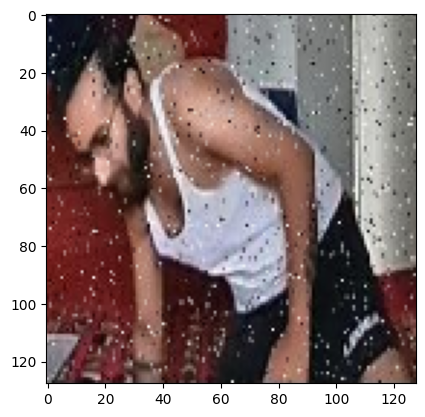

In [47]:
plt.imshow(X_train[722])
plt.show()

In [48]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

2024-07-22 05:10:24.971361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 05:10:24.971472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 05:10:25.112388: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.applications import VGG16

def prepare_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)  # Adjust number of units as needed
    x = Dropout(0.2)(x)  # Dropout for regularization
    predictions = Dense(1, activation='sigmoid')(x)  # 5 output units for 5 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = prepare_model()
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [50]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
BATCH_SIZE = 32
EPOCHS = 20

In [51]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS)

Epoch 1/20
 3/66 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4618 - loss: 1.9005  

I0000 00:00:1721625094.483144     144 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721625094.509077     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.7704 - loss: 0.7103
Epoch 2/20
 3/66 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9271 - loss: 0.1822

W0000 00:00:1721625105.597144     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9377 - loss: 0.1613
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9605 - loss: 0.1086
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9444 - loss: 0.1394
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9847 - loss: 0.0522
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9915 - loss: 0.0303
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9964 - loss: 0.0248
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9982 - loss: 0.0148
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9991 - loss: 0.0104
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 11/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9996 - loss: 0.0067
Epoch 12/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 13/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 1.0000 - 

In [52]:
model.save('/kaggle/working/pranav_final3.h5')

In [53]:
model = ' '

In [54]:
from keras.models import load_model
new_model=load_model('/kaggle/input/weights-vgg-pranav/pranav_final3.h5')



In [55]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,019 (72.14 MB)

 Trainable params: 18,910,017 (72.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

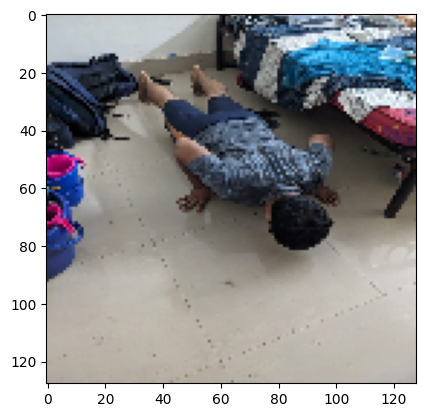

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.999103]]
1


In [56]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
image_path = "/kaggle/input/trial-6/WhatsApp Image 2024-03-15 at 22.44.08_6d069255.jpg"
# Load and preprocess the image
img = image.load_img(image_path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image
img_array = img_array.reshape((1, 128, 128, 3))
# plt.imshow(img_array)
# plt.show()
predictions = new_model.predict(img_array)
print(predictions)
if(predictions[0][0]>=0.5):
    print("1")
else:
    print("0")



In [57]:
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16807, done.
remote: Counting objects: 100% (348/348), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 16807 (delta 187), reused 179 (delta 94), pack-reused 16459
Receiving objects: 100% (16807/16807), 15.56 MiB | 34.20 MiB/s, done.
Resolving deltas: 100% (11486/11486), done.


In [58]:
import torch

In [60]:
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
yolo_model.classes = [0]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-22 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [61]:

def print_and_save_bounding_boxes(results, image_path):
    # Extract image width and height
    img = Image.open(image_path)
    image_width, image_height = img.size
    img_filename = os.path.splitext(os.path.basename(image_path))[0]  # Get filename without path or extension

    # Create filename for text file
    filename = f"{img_filename}.txt"
    with open(filename, "w") as f:
        boxes =[]
        for i, detection in enumerate(results.pandas().xyxy[0].values):  # Use .values to access data
            x_min, y_min, x_max, y_max, confidence, class_id, *extra_values = detection.tolist()
            if(confidence>0.3):
                label = results.names[int(class_id)]
                class_label = class_id
                x_center = (x_min + x_max) / 2 / image_width
                y_center = (y_min + y_max) / 2 / image_height
                norm_width = (x_max - x_min) / image_width
                norm_height = (y_max - y_min) / image_height

                print(f"Labels: {x_center} {y_center} {norm_width} {norm_height} {confidence}")
                print(f"Object {i + 1}: {label} (Confidence: {confidence:.2f})")
                f.write(f"{label} {x_center} {y_center} {norm_width} {norm_height} {confidence}\n")
                temp = [x_center,y_center,norm_width,norm_height]
                boxes.append(temp)
        return boxes         

# Function to draw bounding box on the detected object and print coordinates
def draw_bounding_box(img_array, object_number, x, y, x_plus_w, y_plus_h):
    color = (0, 255, 0)  # BGR
    cv2.rectangle(img_array, (x, y), (x_plus_w, y_plus_h), color, 2)
    

# Function to perform object detection
def detect_objects(image_path):
    # Load image
    img = Image.open(image_path)

    # Convert Image object to NumPy array
    img_array = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # Note: Color conversion
    results = yolo_model(img, size=640)  # includes NMS
    #results.print()  
    results.show()
    boxes  = print_and_save_bounding_boxes(results, image_path)
    # print("hi:",results.xyxy[0])
    num_bounding_boxes = len(results.xyxy[0])  # Number of bounding boxes
    print(f"Number of Objects Detected {num_bounding_boxes}")
    # Draw bounding boxes
    for i in range(num_bounding_boxes):
        x, y, x_plus_w, y_plus_h, _, _ = results.xyxy[0][i]
        draw_bounding_box(img_array, i + 1, round(x.item()), round(y.item()), round(x_plus_w.item()), round(y_plus_h.item()))

    return boxes


In [62]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
pref_size = (128,128)

In [63]:
def predictions (image_path):
    #     img = cv2.imread(image_path)
    #     img = cv2.resize(img, pref_size)
    #     img = img / 255.0
    #     img = np.expand_dims(img, axis=0)

    #     for i in range(len(train_img_files)):
        img = plt.imread(image_path)
    #     with open(r2+train_label_files[i],'r') as file:
    #         r = file.readlines()
        bounding_boxes = detect_objects(image_path)
        print(bounding_boxes)
    #     for j in r:
    #         j = j.split()
    #        bounding_boxes.append([int(j[0]),float(j[1]),float(j[2]),float(j[3]),float(j[4])])
        complete_images=[]
        for box in bounding_boxes:
            image_height, image_width, _ = img.shape
            xmin, ymin, width, height = box[:]
            xmin = int(xmin * image_width)
            ymin = int(ymin * image_height)
            width = int(width * image_width)
            height = int(height * image_height)
    #         complete_class.append(box[0])
            complete_images.append(img[ymin-height//2:ymin+height//2, xmin-width//2:xmin+width//2])
        for cropped_img in complete_images:
            plt.imshow(cropped_img)
            plt.axis('off')  # Turn off axis
            plt.show()
    #         img_n = cv2.resize(img, pref_size)
    #         plt.imshow(img_n)
    #         plt.show()
    #         print(img_n.shape)
    #         img_n = img_n /255.0
    #         img_n = np.expand_dims(img, axis=0)
    #         predictions = model.predict(img_n)
    #         print(np.argmax(predictions))
            cropped_img_resized = cv2.resize(cropped_img, pref_size)
            plt.imshow(cropped_img_resized)
            plt.show()
            cropped_img_resized = cropped_img_resized / 255.0
            #cv2.imshow(cropped_img_resized)
            cropped_img_resized = np.expand_dims(cropped_img_resized, axis=0)
            predictions = new_model.predict(cropped_img_resized)
            print(predictions[0][0])
            if(predictions[0][0]>=0.6):
                print("Fall detected")
            else:
                print("No Fall Detected")

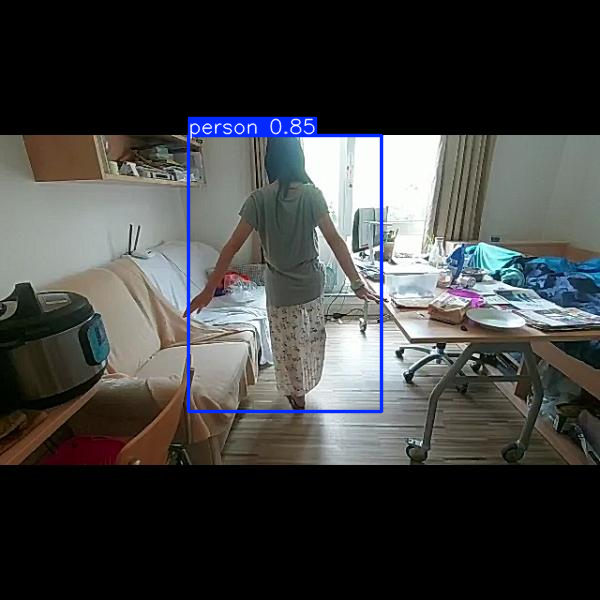

Labels: 0.4743692016601562 0.4561528396606445 0.3215329996744792 0.4590552012125651 0.8486318588256836
Object 1: person (Confidence: 0.85)
Number of Objects Detected 1
[[0.4743692016601562, 0.4561528396606445, 0.3215329996744792, 0.4590552012125651]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7.429216e-08
No Fall Detected


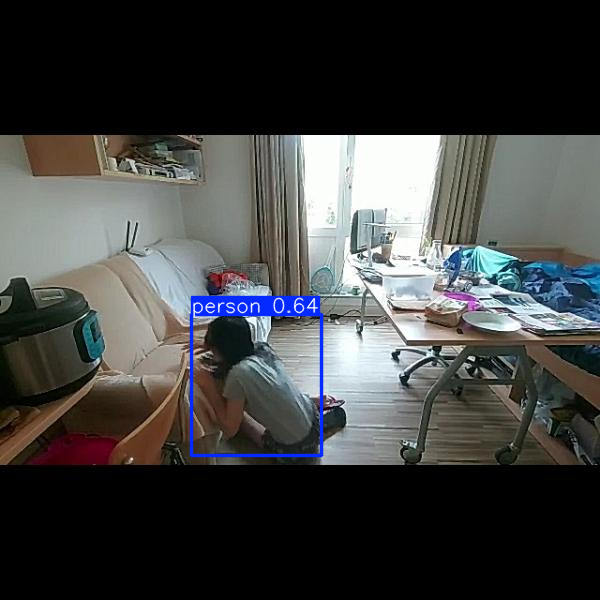

Labels: 0.4275476710001628 0.6417450205485026 0.2156830596923828 0.23476303100585938 0.6361461281776428
Object 1: person (Confidence: 0.64)
Number of Objects Detected 1
[[0.4275476710001628, 0.6417450205485026, 0.2156830596923828, 0.23476303100585938]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.99912924
Fall detected


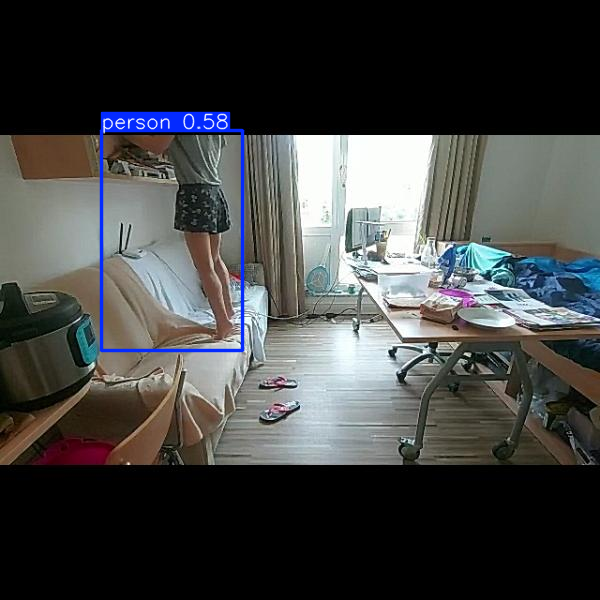

Labels: 0.28691505432128905 0.4009038162231445 0.23499969482421876 0.36594769795735677 0.578572690486908
Object 1: person (Confidence: 0.58)
Number of Objects Detected 1
[[0.28691505432128905, 0.4009038162231445, 0.23499969482421876, 0.36594769795735677]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
9.070789e-05
No Fall Detected


In [68]:
z = os.listdir('/kaggle/input/scammer/test')
for i in (0,10,15):
    if(z!= '/kaggle/input/scammer/test/_annotations.csv'):
        predictions('/kaggle/input/scammer/test/'+z[i])